In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam
from keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
# Dataset Handling
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahulsah06/gooogle-stock-price")

print("Path to dataset files:", path)

# Load and Concatenate Data
df_train = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv')
df = pd.concat([df_train, df_test])
df = df.loc[:, ["Open"]].values

Path to dataset files: /kaggle/input/gooogle-stock-price


In [24]:
# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(df_train[["Open"]].values)

# Create Training Data (X_train, y_train)
X_train, y_train = [], []
timesteps = 50  # Baseline timesteps

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

# Convert to NumPy arrays and reshape
X_train = np.array(X_train)
y_train = np.array(y_train)


In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Reshape data for LSTM input (3D array: samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [26]:
# Define the model
def build_and_train_model(X_train, y_train, timesteps=50, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=50, model_type="LSTM"):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    # Add the specified RNN layer
    if model_type == "LSTM":
        model.add(LSTM(units=units, return_sequences=True))
    elif model_type == "GRU":
        model.add(GRU(units=units, return_sequences=True))
    elif model_type == "RNN":
        model.add(SimpleRNN(units=units, return_sequences=True))

    # Dropout layer
    model.add(Dropout(dropout_rate))

    # Add a second RNN layer
    if model_type == "LSTM":
        model.add(LSTM(units=units, return_sequences=False))
    elif model_type == "GRU":
        model.add(GRU(units=units, return_sequences=False))
    elif model_type == "RNN":
        model.add(SimpleRNN(units=units, return_sequences=False))

    # Dropout layer
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    return model, history



In [27]:
# Baseline Model (LSTM with default parameters)
baseline_model, baseline_history = build_and_train_model(
    X_train, y_train, timesteps=50, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=50, model_type="LSTM"
)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0841 - val_loss: 0.0109
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0065 - val_loss: 0.0032
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0

In [28]:
# Train GRU Model
gru_model, gru_history = build_and_train_model(
    X_train, y_train, timesteps=50, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=50, model_type="GRU"
)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0809 - val_loss: 0.0160
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0036 - val_loss: 7.6786e-04
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0028 - val_loss: 9.1907e-04
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0027 - val_loss: 7.0004e-04
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0021 - val_loss: 6.9256e-04
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0019 - val_loss: 9.4295e-04
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 5

In [29]:
# Train Vanilla RNN Model
rnn_model, rnn_history = build_and_train_model(
    X_train, y_train, timesteps=50, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=50, model_type="RNN"
)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1079 - val_loss: 0.0044
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0311 - val_loss: 0.0012
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0203 - val_loss: 0.0119
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0148 - val_loss: 0.0058
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0104 - val_loss: 0.0078
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0099 - val_loss: 6.5103e-04
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0090 - val_loss: 0.0014
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0064 - val_loss: 7.8309e-04
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0071 - val_loss: 0.0028
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054 - val_loss: 5.4115e-04
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0055 - val_loss: 7.3144e-04
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/

In [30]:
# Step 1: Extract the data slice from the DataFrame
inputs = df[len(df) - len(df_test) - timesteps:].copy()

# Step 2: Remove commas and convert to numeric (only for string columns)
if isinstance(inputs, pd.DataFrame):  # Ensure inputs is a DataFrame
    for col in inputs.columns:
        if inputs[col].dtype == 'object':  # Check if the column contains string data
            inputs[col] = inputs[col].str.replace(',', '').astype(float)

# Step 3: Convert to NumPy array if it's not already (no need for .values if already an ndarray)
if isinstance(inputs, pd.DataFrame):
    inputs = inputs.values  # Convert to NumPy array for scaling

# Step 4: Apply the scaler transformation
inputs = scaler.transform(inputs)

# Step 5: Prepare the test data
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [31]:
# Predictions for all models
def predict_and_evaluate(model, model_type):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    mse = mean_squared_error(df_test['Open'].values, predictions)
    mape = mean_absolute_percentage_error(df_test['Open'].values, predictions.flatten())

    print(f"{model_type} Model MSE: {mse:.4f}")
    print(f"{model_type} Model MAPE: {mape * 100:.2f}%")
    return predictions, mse, mape



In [32]:
# Evaluate all models
baseline_predictions, baseline_mse, baseline_mape = predict_and_evaluate(baseline_model, "Baseline LSTM")
gru_predictions, gru_mse, gru_mape = predict_and_evaluate(gru_model, "GRU")
rnn_predictions, rnn_mse, rnn_mape = predict_and_evaluate(rnn_model, "RNN")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
Baseline LSTM Model MSE: 525.6201
Baseline LSTM Model MAPE: 2.55%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
GRU Model MSE: 346.6635
GRU Model MAPE: 2.10%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
RNN Model MSE: 225.2706
RNN Model MAPE: 1.70%


In [35]:
# Log and Compare Metrics
comparison_df = pd.DataFrame({
    "Model": ["LSTM", "GRU", "Vanilla RNN"],
    "MSE": [baseline_mse, gru_mse, rnn_mse],
    "MAPE (%)": [baseline_mape * 100, gru_mape * 100, rnn_mape * 100]
})

print("Model Performance Comparison:")
print(comparison_df)

Model Performance Comparison:
         Model         MSE  MAPE (%)
0         LSTM  525.620065  2.550531
1          GRU  346.663482  2.104110
2  Vanilla RNN  225.270594  1.697641


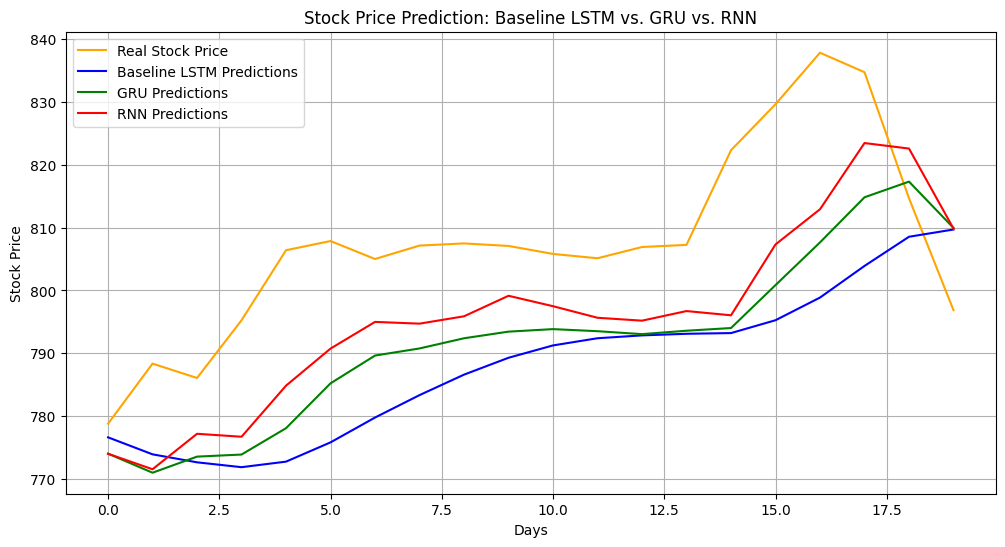

In [36]:
# Plot Comparison
plt.figure(figsize=(12, 6))
plt.plot(df_test['Open'].values, color="orange", label="Real Stock Price")  # Actual data
plt.plot(baseline_predictions, color="blue", label="Baseline LSTM Predictions")
plt.plot(gru_predictions, color="green", label="GRU Predictions")
plt.plot(rnn_predictions, color="red", label="RNN Predictions")
plt.title("Stock Price Prediction: Baseline LSTM vs. GRU vs. RNN")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


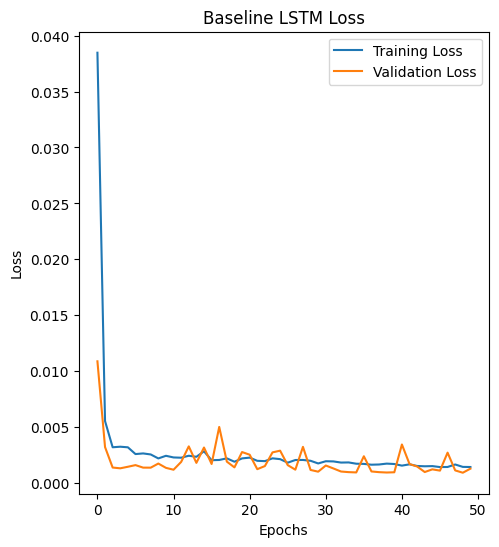

In [37]:
# Plot Training & Validation Loss for All Models
plt.figure(figsize=(18, 6))

# Baseline Loss
plt.subplot(1, 3, 1)
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.title("Baseline LSTM Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


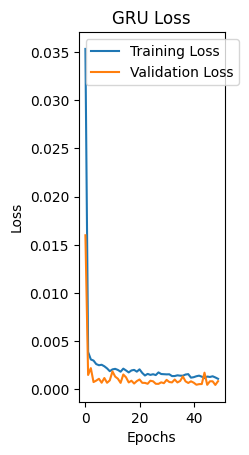

In [38]:
# GRU Loss
plt.subplot(1, 3, 2)
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title("GRU Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


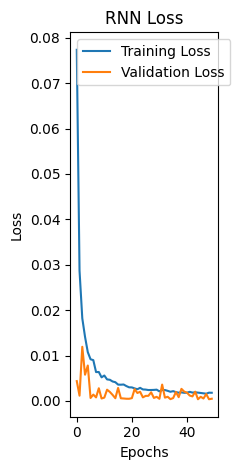

In [39]:
# RNN Loss
plt.subplot(1, 3, 3)
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title("RNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()